In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import os


In [2]:
data_path = os.path.join('..', 'data', 'IMDB_Dataset.csv')
data = pd.read_csv(data_path)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.shape

(50000, 2)

In [4]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
 # Removing duplicates and null value
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [6]:
# Text clean up

data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

## For a single word

In [8]:
text = data['review'][0]
text

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [9]:
import re
import string
from nltk.tokenize import word_tokenize 

punct = string.punctuation

def preprocess_sentence(sentence):
    sentence = sentence.lower()
    sentence = ' '.join([word for word in sentence.split() if word not in stopwords.words('english')])
    sentence = re.sub('<.*?>', '', sentence)
    sentence = re.sub('[^\w\s]', '', sentence)

    return sentence

preprocess_sentence(text)

'one reviewers mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away it well mannered middle class inmates t

## Apply to column

In [10]:
data['review'] = data['review'].apply(preprocess_sentence)
data.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production the filming techni...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


## visualize common words

In [11]:
positive_words = ' '.join(word for word in data[data['sentiment'] == 'positive']['review'].astype(str))
negative_words = ' '.join(word for word in data[data['sentiment'] == 'negative']['review'].astype(str))

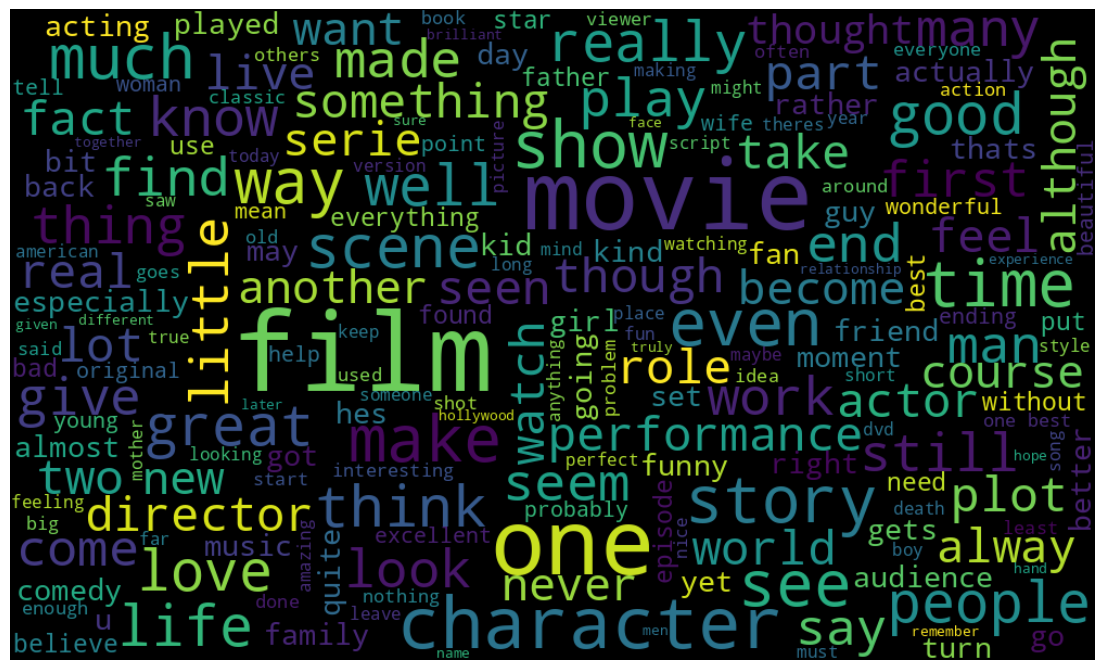

In [12]:
from wordcloud import WordCloud

wordcloud = WordCloud(height=600, width=1000, max_font_size=100)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud.generate(positive_words), interpolation='bilinear')
plt.axis('off')
plt.show()

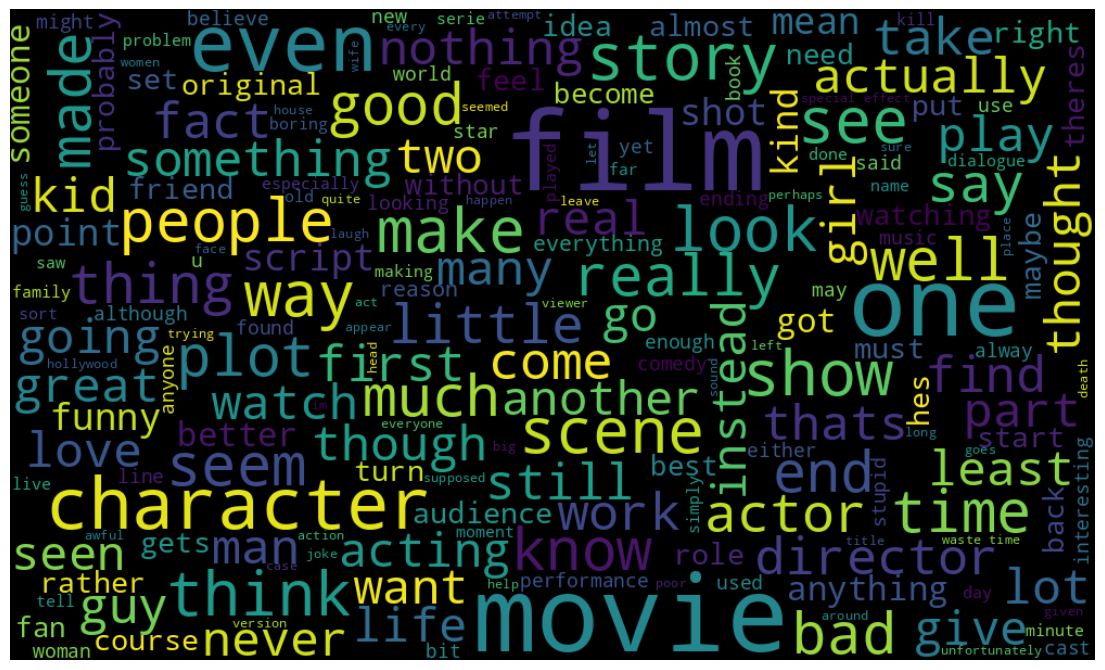

In [13]:
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud.generate(negative_words), interpolation='bilinear')
plt.axis('off')
plt.show()

## Model Building

In [14]:
def encode_labels(label):
    return 1 if label == 'positive' else 0

data['sentiment'] = data['sentiment'].apply(encode_labels)
data.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production the filming techni...,1
2,thought wonderful way spend time hot summer we...,1
3,basically theres family little boy jake thinks...,0
4,petter matteis love time money visually stunni...,1


In [15]:
X = data['review']
y = data['sentiment']

#train test split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

X_train.shape

(34707,)

In [16]:
positive_train_count =  y_train[y_train == 0].count()
negative_train_count =  y_train[y_train == 1].count()

print('Number of negatives', positive_train_count)
print('Number of positives', negative_train_count)
print('ratio: ', round(positive_train_count / negative_train_count, 2))


Number of negatives 17294
Number of positives 17413
ratio:  0.99


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_vector = cv.fit_transform(X_train)
X_test_vector = cv.transform(X_test)

X_test_vector.shape

(14875, 177192)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

rf = RandomForestClassifier().fit(X_train_vector, y_train)
y_pred = rf.predict(X_test_vector)


In [19]:
print('accuracy: ', accuracy_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('f1_score: ', f1_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))

accuracy:  0.8530420168067226
recall:  0.8574488020345336
f1_score:  0.8542472329643952
precision:  0.8510694831938356


In [20]:
import joblib

rf_model_path = os.path.join('..', 'models', 'rf_classifier.pkl')
count_vectorizer_path = os.path.join('..', 'models', 'count_vectorizer.pkl')
joblib.dump(rf, filename=rf_model_path)
joblib.dump(cv, filename=count_vectorizer_path)

['../models/count_vectorizer.pkl']

## testing

In [21]:
rf_model = joblib.load(rf_model_path)
count_vectorizer = joblib.load(count_vectorizer_path)



In [22]:
corpus = ['This show is worse than I expected']
rf_model.predict(count_vectorizer.transform(corpus))

array([0])

In [23]:
corpus = ['This show satisfied my taste, could not take my eyes off it']
rf_model.predict(count_vectorizer.transform(corpus))

array([1])